## Dua Batool
### db07098

In [10]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
df = pd.read_csv('EmployeeSalaryRegression.csv')

In [12]:
df

,Age,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
0,41,Sales,1,2,Life Sciences,Female,94,2,Sales Executive,Single,...,3,0,8,0,1,6,4,0,5,5993
1,49,Research & Development,8,1,Life Sciences,Male,61,2,Research Scientist,Married,...,4,1,10,3,3,10,7,1,7,5130
2,37,Research & Development,2,2,Other,Male,92,1,Laboratory Technician,Single,...,3,0,7,3,3,0,0,0,0,2090
3,33,Research & Development,3,4,Life Sciences,Female,56,1,Research Scientist,Married,...,3,0,8,3,3,8,7,3,0,2909
4,27,Research & Development,2,1,Medical,Male,40,1,Laboratory Technician,Married,...,3,1,6,3,3,2,2,2,2,3468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,2,Medical,Male,41,2,Laboratory Technician,Married,...,3,1,17,3,3,5,2,0,3,2571
1466,39,Research & Development,6,1,Medical,Male,42,3,Healthcare Representative,Married,...,3,1,9,5,3,7,7,1,7,9991
1467,27,Research & Development,4,3,Life Sciences,Male,87,2,Manufacturing Director,Married,...,4,1,6,0,3,6,2,0,3,6142
1468,49,Sales,2,3,Medical,Male,63,2,Sales Executive,Married,...,3,0,17,3,2,9,6,0,8,5390


### Helper Function to visualize data

In [13]:
def plot_regression_line(input_variable, response_variable):
    sns.lmplot(x=input_variable, y=response_variable, data=df, line_kws={'color': 'blue'}, scatter_kws={'color': 'red'})
    ax = plt.gca()
    ax.legend(['Data', 'Fitted Model'])
    plt.show()

### Q1: Regression model between TotalWorkingYears and MonthlyIncome

In [14]:
X = df.drop(['MonthlyIncome'], axis = 1)
Y = df['MonthlyIncome']   # response variable

In [15]:
X

,Age,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,...,OverTime,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Sales,1,2,Life Sciences,Female,94,2,Sales Executive,Single,...,Yes,3,0,8,0,1,6,4,0,5
1,49,Research & Development,8,1,Life Sciences,Male,61,2,Research Scientist,Married,...,No,4,1,10,3,3,10,7,1,7
2,37,Research & Development,2,2,Other,Male,92,1,Laboratory Technician,Single,...,Yes,3,0,7,3,3,0,0,0,0
3,33,Research & Development,3,4,Life Sciences,Female,56,1,Research Scientist,Married,...,Yes,3,0,8,3,3,8,7,3,0
4,27,Research & Development,2,1,Medical,Male,40,1,Laboratory Technician,Married,...,No,3,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,2,Medical,Male,41,2,Laboratory Technician,Married,...,No,3,1,17,3,3,5,2,0,3
1466,39,Research & Development,6,1,Medical,Male,42,3,Healthcare Representative,Married,...,No,3,1,9,5,3,7,7,1,7
1467,27,Research & Development,4,3,Life Sciences,Male,87,2,Manufacturing Director,Married,...,Yes,4,1,6,0,3,6,2,0,3
1468,49,Sales,2,3,Medical,Male,63,2,Sales Executive,Married,...,No,3,0,17,3,2,9,6,0,8


In [16]:
Y

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

In [17]:
X = sm.add_constant(X['TotalWorkingYears'])

In [18]:
X

,const,TotalWorkingYears
0,1.0,8
1,1.0,10
2,1.0,7
3,1.0,8
4,1.0,6
...,...,...
1465,1.0,17
1466,1.0,9
1467,1.0,6
1468,1.0,17


In [19]:
model = sm.OLS(Y,X).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2178.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          2.73e-292
Time:                        21:24:32   Log-Likelihood:                -13848.
No. Observations:                1470   AIC:                         2.770e+04
Df Residuals:                    1468   BIC:                         2.771e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1227.9353    137.299      8.944      0.000     958.612    1497.259
TotalWorkingYears   467.6584     10.021     46.669      0.000     448.002     487.315
==============================================================================
Omnibus:                       47.473   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.304
Skew:                           0.269   Prob(JB):                     6.02e-18
Kurtosis:                       4.003   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y-interception = Intercept = 1227 ~ 1228: it means that staring salary for the employee is around this range

gradient = 467: If the total working years of the employee increases by 1 unit, the avegrage monthly income increases by 467 units.

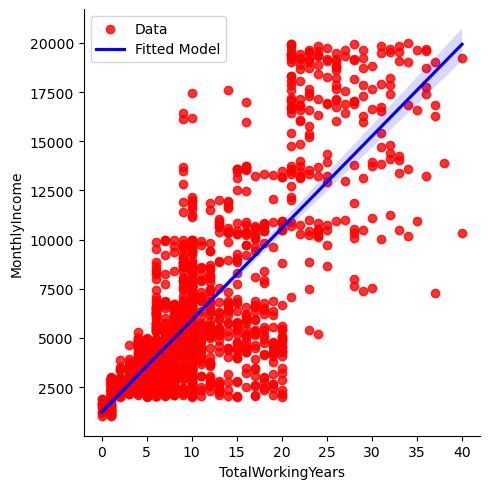

In [21]:
plot_regression_line('TotalWorkingYears','MonthlyIncome')

We can see from the graph above that MonthlyIncome and TotalWorkingYears have a positive linear relationship.

### Q2: Regression model between Age and DistanceFromHome

In [22]:
X = df.drop(['DistanceFromHome'], axis = 1)
Y = df['DistanceFromHome']   # response variable

In [23]:
X

,Age,Department,Education,EducationField,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,NumCompaniesWorked,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
0,41,Sales,2,Life Sciences,Female,94,2,Sales Executive,Single,8,...,3,0,8,0,1,6,4,0,5,5993
1,49,Research & Development,1,Life Sciences,Male,61,2,Research Scientist,Married,1,...,4,1,10,3,3,10,7,1,7,5130
2,37,Research & Development,2,Other,Male,92,1,Laboratory Technician,Single,6,...,3,0,7,3,3,0,0,0,0,2090
3,33,Research & Development,4,Life Sciences,Female,56,1,Research Scientist,Married,1,...,3,0,8,3,3,8,7,3,0,2909
4,27,Research & Development,1,Medical,Male,40,1,Laboratory Technician,Married,9,...,3,1,6,3,3,2,2,2,2,3468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,2,Medical,Male,41,2,Laboratory Technician,Married,4,...,3,1,17,3,3,5,2,0,3,2571
1466,39,Research & Development,1,Medical,Male,42,3,Healthcare Representative,Married,4,...,3,1,9,5,3,7,7,1,7,9991
1467,27,Research & Development,3,Life Sciences,Male,87,2,Manufacturing Director,Married,1,...,4,1,6,0,3,6,2,0,3,6142
1468,49,Sales,3,Medical,Male,63,2,Sales Executive,Married,2,...,3,0,17,3,2,9,6,0,8,5390


In [24]:
Y

0        1
1        8
2        2
3        3
4        2
        ..
1465    23
1466     6
1467     4
1468     2
1469     8
Name: DistanceFromHome, Length: 1470, dtype: int64

In [29]:
X = sm.add_constant(X['Age'])  

In [30]:
X

,const,Age
0,1.0,41
1,1.0,49
2,1.0,37
3,1.0,33
4,1.0,27
...,...,...
1465,1.0,36
1466,1.0,39
1467,1.0,27
1468,1.0,49


In [31]:
model = sm.OLS(Y,X).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       DistanceFromHome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.004174
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.948
Time:                        21:24:53   Log-Likelihood:                -5161.6
No. Observations:                1470   AIC:                         1.033e+04
Df Residuals:                    1468   BIC:                         1.034e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2478      0.881     10.497      0.000       7.520      10.976
Age           -0.0015      0.023     -0.065      0.948      -0.047       0.044
==============================================================================
Omnibus:                      168.749   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.762
Skew:                           0.957   Prob(JB):                     3.48e-50
Kurtosis:                       2.773   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

there is no relation between "Age" and "DistanceFromHome" because:
- R-squared value is 0.0 and 
- p-value is greater than 0.05   
- the gradient is very close to 0 
so it means there is no connection between "Age" and "DistanceFromHome"

y-interception = const = 9.247. which means that when the Age is 0 the DistanceFromHome of that person is 9.274 units.

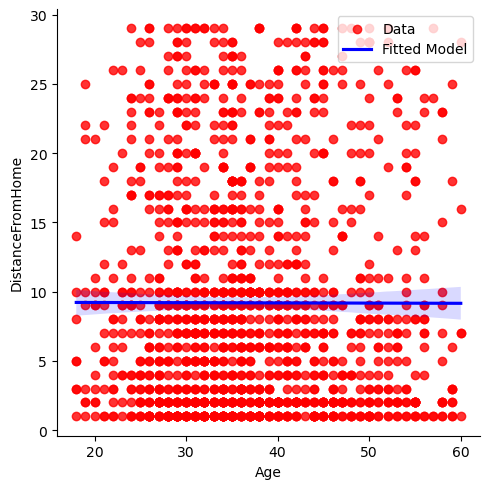

In [33]:
plot_regression_line('Age','DistanceFromHome')

We can see from the above graph that there is no relation between "Age" and 'DistanceFromHome' because there is a horizontal line of bestfit and the gradient from above summary is almost zero. 

### Q3: Calculating correlation for Q1 and Q2

#### Helper Function to calculate correlation

In [34]:
def correlation(var1, var2):
    return df[var1].corr(df[var2])

### Correlation between TotalWorkingYears and MonthlyIncome

In [35]:
input_variable = 'TotalWorkingYears'
response_variable = 'MonthlyIncome'

In [36]:
correlation(input_variable, response_variable)

0.7728932462543562

The correlation between TotalWorkingYears and MonthlyIncome is 0.772 which is close to 1. There is a good positive correlation between these two variables.

### Correlation between Age and DistanceFromHome

In [37]:
input_variable = 'Age'
response_variable = 'DistanceFromHome'

In [38]:
correlation(input_variable, response_variable)

-0.0016861201480870226

The correlation between Age and DistanceFromHome is -0.001 which is really close to 0. So we can say that there is no correlation between these two variables.

### Q4: Regression model to predict 'MonthlyIncome' using all other inputs

In [68]:
df1 = df

In [69]:
non_numeric_cols = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
non_numeric_cols

['Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [70]:
df1 = pd.get_dummies(df1, columns = [i for i in non_numeric_cols])

In [71]:
X = df1.drop(['MonthlyIncome'],axis=1)
Y = df1['MonthlyIncome']

X = sm.add_constant(X)

In [72]:
X.head()

,const,Age,DistanceFromHome,Education,HourlyRate,JobLevel,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1.0,41,1,2,94,2,8,3,0,8,...,0,0,0,1,0,0,0,1,0,1
1,1.0,49,8,1,61,2,1,4,1,10,...,0,0,1,0,0,0,1,0,1,0
2,1.0,37,2,2,92,1,6,3,0,7,...,0,0,0,0,0,0,0,1,0,1
3,1.0,33,3,4,56,1,1,3,0,8,...,0,0,1,0,0,0,1,0,0,1
4,1.0,27,2,1,40,1,9,3,1,6,...,0,0,0,0,0,0,1,0,1,0


In [73]:
modelall = sm.OLS(Y, X).fit()

In [74]:
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     715.9
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:36:01   Log-Likelihood:                -12394.
No. Observations:                1470   AIC:                         2.486e+04
Df Residuals:                    1435   BIC:                         2.504e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               364.2019    129.213      2.819      0.005     110.735     617.669
Age                                  -5.3357      4.614     -1.156      0.248     -14.386       3.715
DistanceFromHome                     -4.8212      3.650     -1.321      0.187     -11.981       2.339
Education                           -11.1578     29.743     -0.375      0.708     -69.502      47.186
HourlyRate                            1.3410      1.454      0.923      0.356      -1.511       4.193
JobLevel                           2759.6363     67.718     40.752      0.000    2626.800    2892.473
NumCompaniesWorked                   11.5087     13.246      0.869      0.385     -14.475      37.493
PerformanceRating                   -29.6861     81.840     -0.363      0.717    -190.225     130.853
StockOptionLevel                    -42.3557     47.499     -0.892      0.373    -135.530      50.818
TotalWorkingYears                    48.0088      8.316      5.773      0.000      31.696      64.321
TrainingTimesLastYear               -16.7479     23.135     -0.724      0.469     -62.130      28.634
WorkLifeBalance                     -22.7978     42.025     -0.542      0.588    -105.235      59.640
YearsAtCompany                        6.6563     10.392      0.641      0.522     -13.729      27.041
YearsInCurrentRole                    1.2712     13.482      0.094      0.925     -25.175      27.717
YearsSinceLastPromotion              23.3883     11.880      1.969      0.049       0.084      46.693
YearsWithCurrManager                -34.1053     13.789     -2.473      0.013     -61.154      -7.057
Department_Human Resources            9.7448    276.725      0.035      0.972    -533.084     552.574
Department_Research & Development   257.1010    170.358      1.509      0.131     -77.077     591.279
Department_Sales                     97.3561    186.808      0.521      0.602    -269.090     463.802
EducationField_Human Resources      114.4753    242.487      0.472      0.637    -361.192     590.143
EducationField_Life Sciences         38.6894     72.369      0.535      0.593    -103.270     180.649
EducationField_Marketing            104.4560    110.500      0.945      0.345    -112.303     321.215
EducationField_Medical               28.7257     76.079      0.378      0.706    -120.513     177.964
EducationField_Other                -46.9271    120.714     -0.389      0.698    -283.722     189.868
EducationField_Technical Degree     124.7826    102.199      1.221      0.222     -75.692     325.257
Gender_Female                       139.3035     72.290      1.927      0.054      -2.501     281.108
Gender_Male                         224.8984     70.391      3.195      0.001      86.818     362.979
JobRole_Healthcare Repr

**Effectiveness of the Model**:

The r-squared value is 0.944 which means that the model is 94.4% effective. The model is effective to a good extent.

**Top Three Most Significant Inputs**

The most signinfcant inputs are JobLevel, TotalWorkingYears, and JobRoles because their p-value is zero or very close to zero. It means that they have big impact on the MonthlyIncome.

**Top three Least Significant Inputs**

The least signinfcant inputs are YearsInCurrentRole, PerformanceRating, and Department because their p-value is above 0.05 so it means they have less impact on the MonthlyIncome.

### Creating New Input and showing Prediction of Monthly Income

In [75]:
newInput = pd.DataFrame({
    'Age': [23], 
    'Department': ['Research & Development'],
    'DistanceFromHome': [20],
    'Education': [4],
    'EducationField': ['Life Sciences'],
    'Gender': ['Male'],
    'HourlyRate': [80],
    'JobLevel': [3],
    'JobRole': ['Research Scientist'],
    'MaritalStatus': ['Single'],
    'NumCompaniesWorked': [2],
    'OverTime': ['No'],
    'PerformanceRating': [3],
    'StockOptionLevel': [0],
    'TotalWorkingYears': [2],
    'TrainingTimesLastYear': [3],
    'WorkLifeBalance': [3],
    'YearsAtCompany': [2],
    'YearsInCurrentRole': [2],
    'YearsSinceLastPromotion': [0],
    'YearsWithCurrManager': [2]
    })

In [76]:
newInput = pd.concat([df, newInput], ignore_index=True)
newInput = newInput.drop(['MonthlyIncome'], axis=1)
df2 = pd.get_dummies(newInput, columns=[i for i in non_numeric_cols])
df2 = sm.add_constant(df2)
newInput = df2.tail(1)
modelall.predict(newInput)

1470    7915.606534
dtype: float64

The predicted MonthlyIncome for the given input using this model is 7915

### Q5: Creating a regression model to predict HourlyRate using all other inputs

In [85]:
df3 = df

In [86]:
df3 = pd.get_dummies(df3, columns = [i for i in non_numeric_cols])

In [87]:
X = df3.drop(['HourlyRate'],axis=1)
Y = df3['HourlyRate']

X = sm.add_constant(X)

In [88]:
X.head()

,const,Age,DistanceFromHome,Education,JobLevel,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1.0,41,1,2,2,8,3,0,8,0,...,0,0,0,1,0,0,0,1,0,1
1,1.0,49,8,1,2,1,4,1,10,3,...,0,0,1,0,0,0,1,0,1,0
2,1.0,37,2,2,1,6,3,0,7,3,...,0,0,0,0,0,0,0,1,0,1
3,1.0,33,3,4,1,1,3,0,8,3,...,0,0,1,0,0,0,1,0,0,1
4,1.0,27,2,1,1,9,3,1,6,3,...,0,0,0,0,0,0,1,0,1,0


In [89]:
modelall = sm.OLS(Y, X).fit()

In [90]:
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HourlyRate   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6846
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.916
Time:                        21:44:58   Log-Likelihood:                -6501.3
No. Observations:                1470   AIC:                         1.307e+04
Df Residuals:                    1435   BIC:                         1.326e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                21.8033      2.281      9.560      0.000      17.329      26.277
Age                                   0.0632      0.084      0.754      0.451      -0.101       0.228
DistanceFromHome                      0.0797      0.066      1.203      0.229      -0.050       0.210
Education                             0.2087      0.540      0.386      0.699      -0.851       1.268
JobLevel                             -3.1841      1.804     -1.765      0.078      -6.722       0.354
NumCompaniesWorked                    0.1083      0.241      0.450      0.653      -0.364       0.580
PerformanceRating                    -0.3151      1.486     -0.212      0.832      -3.230       2.599
StockOptionLevel                      1.4108      0.862      1.637      0.102      -0.280       3.101
TotalWorkingYears                     0.0492      0.153      0.322      0.747      -0.250       0.349
TrainingTimesLastYear                -0.0827      0.420     -0.197      0.844      -0.907       0.741
WorkLifeBalance                       0.1144      0.763      0.150      0.881      -1.382       1.611
YearsAtCompany                        0.0478      0.189      0.253      0.800      -0.322       0.418
YearsInCurrentRole                   -0.1133      0.245     -0.463      0.643      -0.593       0.367
YearsSinceLastPromotion              -0.1686      0.216     -0.781      0.435      -0.592       0.255
YearsWithCurrManager                 -0.0090      0.251     -0.036      0.972      -0.501       0.483
MonthlyIncome                         0.0004      0.000      0.923      0.356      -0.000       0.001
Department_Human Resources            7.7458      5.020      1.543      0.123      -2.101      17.592
Department_Research & Development     6.3040      3.091      2.040      0.042       0.241      12.367
Department_Sales                      7.7535      3.386      2.290      0.022       1.112      14.395
EducationField_Human Resources       -1.5980      4.402     -0.363      0.717     -10.234       7.038
EducationField_Life Sciences          5.9413      1.305      4.554      0.000       3.382       8.500
EducationField_Marketing              5.6866      2.001      2.842      0.005       1.761       9.612
EducationField_Medical                4.2543      1.377      3.090      0.002       1.554       6.955
EducationField_Other                  1.6687      2.191      0.762      0.446      -2.630       5.967
EducationField_Technical Degree       5.8505      1.850      3.163      0.002       2.222       9.479
Gender_Female                        10.9132      1.282      8.512      0.000       8.398      13.428
Gender_Male                          10.8901      1.250      8.713      0.000       8.438      13.342
JobRole_Healthcare Repr

**Effectiveness of the Model**:

The r-squared value is 0.016 which means that the model is 1.6% effective. The model is not effective.

**Top Three Most Significant Inputs**

The most signinfcant inputs are Gender, MaritalStatus, OverTime. because eventhough, after hot-encoding all three of these columns were divided into multiple sub-columns, all sub parts have p-value of 0 or very close to 0. It means that they have big impact on the HourlyRate.

**Top three Least Significant Inputs**

The least signinfcant inputs are WorkLifeBalance, YearsWithCurrManager, TrainingTimesLastYear. because their p-value is above 0.05. It means they have very less impact on the HourlyRate.

### Creating New Input and showing Prediction of HourlyRate

Using the same values to check the model as used before. I've place the MonthlyIncome = 7915 as it was predicted by the previous model.
The value of HourlyRate should be closer to 80 if this model works as expected.

In [91]:
newInput = pd.DataFrame({
    'Age': [23], 
    'Department': ['Research & Development'],
    'DistanceFromHome': [20],
    'Education': [4],
    'EducationField': ['Life Sciences'],
    'Gender': ['Male'],
    'JobLevel': [3],
    'JobRole': ['Research Scientist'],
    'MaritalStatus': ['Single'],
    'NumCompaniesWorked': [2],
    'OverTime': ['No'],
    'PerformanceRating': [3],
    'StockOptionLevel': [0],
    'TotalWorkingYears': [2],
    'TrainingTimesLastYear': [3],
    'WorkLifeBalance': [3],
    'YearsAtCompany': [2],
    'YearsInCurrentRole': [2],
    'YearsSinceLastPromotion': [0],
    'YearsWithCurrManager': [2],
    'MonthlyIncome' : [7915]
    })

In [92]:
newInput = pd.concat([df, newInput], ignore_index=True)
newInput = newInput.drop(['HourlyRate'], axis=1)
df4 = pd.get_dummies(newInput, columns=[i for i in non_numeric_cols])
df4 = sm.add_constant(df4)
newInput = df4.tail(1)
modelall.predict(newInput)

1470    63.404303
dtype: float64

The Predicted Value for HourlyRate came out to be equal to 63. While it is still somewhat close to what should have come (80), this is not a good prediction.

### Q6: Creating new model to predict monthly income

In [98]:
# The three selected inputs were JobLevel, TotalWorkingYears and JobRole. I've included all hot-encoded columns for JobRole here.
df_s = df1[["JobLevel", "TotalWorkingYears", "JobRole_Healthcare Representative", 
            "JobRole_Human Resources", "JobRole_Laboratory Technician", "JobRole_Manager", 
            "JobRole_Manufacturing Director", "JobRole_Research Director", "JobRole_Research Scientist", 
            "JobRole_Sales Executive", "JobRole_Sales Representative"]]

In [94]:
X = df_s
Y = df['MonthlyIncome']

X = sm.add_constant(X)

In [95]:
modelall = sm.OLS(Y,X).fit()

In [96]:
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     2434.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:49:39   Log-Likelihood:                -12406.
No. Observations:                1470   AIC:                         2.483e+04
Df Residuals:                    1459   BIC:                         2.489e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               650.7952    115.041      5.657      0.000     425.131     876.459
JobLevel                           2770.3438     66.712     41.527      0.000    2639.481    2901.206
TotalWorkingYears                    43.7428      6.243      7.007      0.000      31.496      55.989
JobRole_Healthcare Representative  -589.2785     95.948     -6.142      0.000    -777.490    -401.067
JobRole_Human Resources            -874.7981    146.171     -5.985      0.000   -1161.526    -588.071
JobRole_Laboratory Technician     -1182.0511     83.040    -14.235      0.000   -1344.942   -1019.160
JobRole_Manager                    3533.6967    159.597     22.141      0.000    3220.633    3846.760
JobRole_Manufacturing Director     -697.5272     91.850     -7.594      0.000    -877.699    -517.356
JobRole_Research Director          3434.5429    156.134     21.997      0.000    3128.273    3740.813
JobRole_Research Scientist        -1078.4361     81.698    -13.200      0.000   -1238.695    -918.177
JobRole_Sales Executive            -662.0867     66.629     -9.937      0.000    -792.786    -531.388
JobRole_Sales Representative      -1233.2667    125.934     -9.793      0.000   -1480.298    -986.236
==============================================================================
Omnibus:                       45.881   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.325
Skew:                           0.204   Prob(JB):                     4.01e-20
Kurtosis:                       4.137   Cond. No.                     1.02e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.76e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The r-squared value is 0.943 which means that the model is 94.3% effective. Using only three of all the inputs, the model still gives us r-squared value of 0.943 so I'd say that it is more efficient to make use of this model as it predicts value based on most effective and statistically significant inputs.

### Q7: Creating 2 new data records and predicting their MonthlyIncome.

For the two new records, I am manually adding the vlaues for the hot-encoded values of JobRoles.

In [99]:
one = pd.DataFrame({
    'Age': [50], 
    'Department': ['Sales'],
    'DistanceFromHome': [20],
    'Education': [3],
    'EducationField': ['Marketing'],
    'Gender': ['Female'],
    'HourlyRate': [90],
    'JobLevel': [7],
    "JobRole_Healthcare Representative": [0],
    "JobRole_Human Resources" : [0],
    "JobRole_Laboratory Technician" : [0],
    "JobRole_Manager" : [0],
    "JobRole_Manufacturing Director" : [1],
    "JobRole_Research Director" : [0],
    "JobRole_Research Scientist" : [0],
    "JobRole_Sales Executive" : [0],
    "JobRole_Sales Representative" : [0],
    'MaritalStatus': ['Married'],
    'NumCompaniesWorked': [8],
    'OverTime': ['Yes'],
    'PerformanceRating': [3],
    'StockOptionLevel': [2],
    'TotalWorkingYears': [30],
    'TrainingTimesLastYear': [2],
    'WorkLifeBalance': [3],
    'YearsAtCompany': [30],
    'YearsInCurrentRole': [1],
    'YearsSinceLastPromotion': [1],
    'YearsWithCurrManager': [5]
    })

In [101]:
two = pd.DataFrame({
    'Age': [23], 
    'Department': ['Research & Development'],
    'DistanceFromHome': [10],
    'Education': [4],
    'EducationField': ['Marketing'],
    'Gender': ['Male'],
    'HourlyRate': [90],
    'JobLevel': [3],
    "JobRole_Healthcare Representative": [0],
    "JobRole_Human Resources" : [0],
    "JobRole_Laboratory Technician" : [0],
    "JobRole_Manager" : [0],
    "JobRole_Manufacturing Director" : [1],
    "JobRole_Research Director" : [0],
    "JobRole_Research Scientist" : [0],
    "JobRole_Sales Executive" : [0],
    "JobRole_Sales Representative" : [0],
    'MaritalStatus': ['Married'],
    'NumCompaniesWorked': [4],
    'OverTime': ['Yes'],
    'PerformanceRating': [2],
    'StockOptionLevel': [0],
    'TotalWorkingYears': [3],
    'TrainingTimesLastYear': [1],
    'WorkLifeBalance': [3],
    'YearsAtCompany': [3],
    'YearsInCurrentRole': [1],
    'YearsSinceLastPromotion': [1],
    'YearsWithCurrManager': [3],
    })

In [103]:
X = pd.concat([two, one], ignore_index = True)
X = X[["JobLevel", "TotalWorkingYears", "JobRole_Healthcare Representative", 
       "JobRole_Human Resources", "JobRole_Laboratory Technician", "JobRole_Manager", 
       "JobRole_Manufacturing Director", "JobRole_Research Director", "JobRole_Research Scientist", 
       "JobRole_Sales Executive", "JobRole_Sales Representative"]]
X=sm.add_constant(X,has_constant='add')
predictions = modelall.predict(X)
print(predictions)

0     8395.527652
1    20657.957666
dtype: float64


The result achieved through prediction for the two cases makes sense as for record one (Output = 1), we get the MonthlyIncome of 20,657 and for record two we get the value for 8395. This difference of values was expected as record one had a greater JobLevel than that of record two. Both have the same Job Role of Manufacturing Director. The first record also had greater TotalWorkingYears hence accounting for the difference in the result.